In [16]:
import pandas as pd
import numpy as np

Que es ka estadistica inferencial?
- Se encarga de inferir o deducir propiedades de una poblacion apartir de una muestra (datos que se logran recolectar) <br>

Que es el test A/B?
- te permite saber si una muestra es mejor que la otra de un intervalo de tiempo
- una poblacion hace referencia a todos los datos
- mientras que una muestra son todos los datos que pudimos recolectar en determinado tiempo
- simepre habra una incertumbre de los datos
- si tuvieramos acceso a todos los datos de la ponlacion podriamos sacar el promedio de la población
- en la practica tenemos que acceder a la estimacion mediante nuestra muestra recolectada, podemos promediar los datos para hacer una estimacion de este valor con ciertos grados de incertidumbre y solo es una aproximación


El muestro aleatorio
- indicada que cada dato dentro de la poblacion tiene la misma probabilidad de ser seleccionado como parte de la muestra
si tuviera 20 datos y solo debo seleccionar solo 5, cada uno tiene una P=1/20
- el muestro aleatorio puede utilizarse en modelos de machine learning dado que tenemos un set de entrenamiento, validación y prueba
- el set de entrenamiento te permite calcular los parametros del modelo
- el set de validacion permite ajustar los hiperparametros del modelo
- y el set de prueba que ayuda a predecir


Muestro aleatorio con remplazo <br>
selecciona elementos al azar pero puedes repetirlos, cada vez que se elige un elemento, se devuelve a la poblacion antes del siguiente intendo
- este es util cuando estas simulando procesos repetitivos
- generar muchas muestras desde una poblacion pequeña

In [17]:
import numpy as np

# Sin reemplazo
muestro_simple=np.random.choice(np.arange(1,10), size=6, replace=False)
print(f'los numeros elegidos{muestro_simple} y ya no pueden volver a repetirse')
# Con reemplazo
muestro_con_remplazo=np.random.choice(np.arange(1,10), size=6, replace=True)
print(f'los numeros elegidos {muestro_con_remplazo} pueden volver a repetirse n veces')


los numeros elegidos[9 8 2 3 1 4] y ya no pueden volver a repetirse
los numeros elegidos [8 5 6 8 5 4] pueden volver a repetirse n veces


El bootstrapping, tecnica estadistica <Br>
es una tecnica de muestro con remplazo:
- utilizada para estimar incertidumbre (intervalos de confianza de una metrica)
- simular muchas muestras apartir de una sola muestra de datos
- mejorar modelos como el random forest al entrensarse multiples veces <br>

Fundamento: 
- cuando se tiene solo una muestra de datos, podemos generar muchas muestras apartir de esta, despues se puede calcular la media, mediana, o precision para estimular su distribucion o variabilidad
- no podemos hacer suposiciones, queremos estimilar variabilidad o confianza de un resultado


In [18]:
datos=np.arange(1,100,2)
datos

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [19]:
df=[]
for i in range(1000):
    muestra=np.random.choice(datos, size=len(datos), replace=True)
    df.append(np.mean(muestra))
df=pd.DataFrame(df, columns=["Muestra"])
df.head()

,Muestra
0,49.36
1,53.24
2,48.84
3,46.88
4,49.68


In [20]:
df_nuevo=df.copy()
df_nuevo

,Muestra
0,49.36
1,53.24
2,48.84
3,46.88
4,49.68
...,...
995,50.24
996,59.28
997,44.52
998,53.36


In [21]:
df_nuevo.columns

Index(['Muestra'], dtype='object')

In [22]:
df_nuevo["Muestra"].describe()

count    1000.000000
mean       50.008960
std         4.048448
min        36.000000
25%        47.400000
50%        50.080000
75%        52.720000
max        62.240000
Name: Muestra, dtype: float64

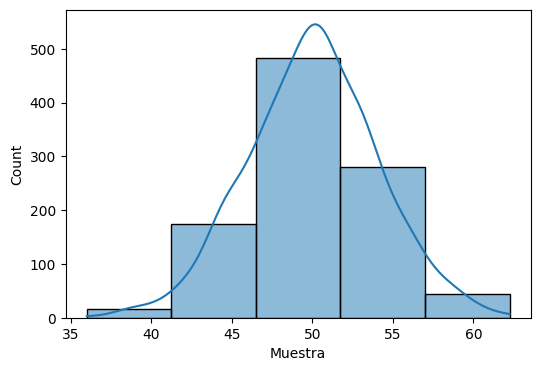

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(data=df_nuevo["Muestra"], bins=5, kde=True)
plt.show()

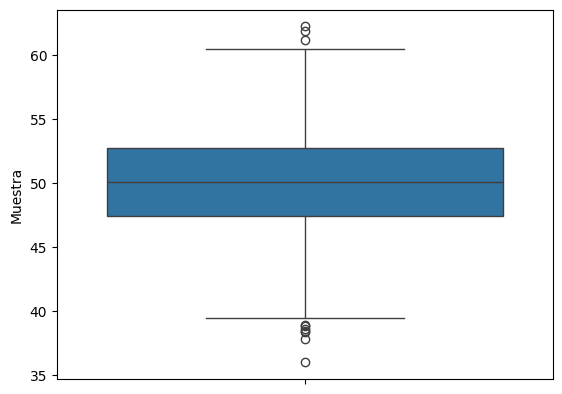

In [24]:
plt.Figure(figsize=(6,4))
sns.boxplot(data=df_nuevo["Muestra"])
plt.show()

In [25]:
df_nuevo["Muestra"].describe()

count    1000.000000
mean       50.008960
std         4.048448
min        36.000000
25%        47.400000
50%        50.080000
75%        52.720000
max        62.240000
Name: Muestra, dtype: float64

Muestreo estatificado

Consiste en dividir la poblacion en estratos y tomar una mmuestra aleatoria de cada uno
- consiste en dividir la poblacion en subgrupos que comparten caracteristicas similares, luego tomar proporciones individuales de cada uno



In [26]:
edad=np.random.choice(np.arange(1,101), size=100, replace=True)
df_estratificado=pd.DataFrame({
    "edad": edad,
    "clasificacion_social":np.where(edad<18, "Niño",
                                    np.where(edad<40, "Adolescente","Adulto"))
})
df_estratificado

,edad,clasificacion_social
0,44,Adulto
1,6,Niño
2,4,Niño
3,60,Adulto
4,48,Adulto
...,...,...
95,70,Adulto
96,63,Adulto
97,30,Adolescente
98,30,Adolescente


In [27]:
from sklearn.model_selection import train_test_split
x=df_estratificado[["edad"]]
y=df_estratificado["clasificacion_social"]
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                test_size=0.3,
                                                stratify=y,
                                                random_state=42)
x_train.head()

,edad
15,10
76,75
33,51
75,14
2,4


In [28]:
y.value_counts()

clasificacion_social
Adulto         59
Adolescente    22
Niño           19
Name: count, dtype: int64

In [29]:
df_train=pd.DataFrame(x_train, columns=["edad"])
df_train

,edad
15,10
76,75
33,51
75,14
2,4
...,...
71,23
95,70
40,11
63,42


In [30]:
df_train["cluster"]=np.where(df_train["edad"]<18, "Niño",
                                    np.where(df_train["edad"]<30, "Adolescente","Adulto"))
df_train.cluster.value_counts()

cluster
Adulto         53
Niño           13
Adolescente     4
Name: count, dtype: int64

In [31]:
print("Distribución original:")
print(y.value_counts(normalize=True))

print("\nDistribución en la muestra (test):")
print(y_test.value_counts(normalize=True))


Distribución original:
clasificacion_social
Adulto         0.59
Adolescente    0.22
Niño           0.19
Name: proportion, dtype: float64

Distribución en la muestra (test):
clasificacion_social
Adulto         0.6
Adolescente    0.2
Niño           0.2
Name: proportion, dtype: float64


Cuano hacemos un muestreo estratificado, podemos tener diferente tipo de proporcion entre todo el data set
- este tipo de muestreo se seleccionan observaciones de cada estrato, pero no en proporcion al tamaño real de ese estrato en la poblacion
en 100 datos distribuidos de la siguiente manera
- adultos 50%
- adolescentes 29%
- niños 13%

si tomamos 70% de entrenamiento los datos que tomara de cda estrato seran los siguientes

- 70*0.58=tomara 41 datos de adultos
- 70*0.29=tomara 20 datos de adolescentes
- 70*0.13=tomara 9 datos de niños
